<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [12]:
data= pd.read_csv("DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
DMV_Test_1    100 non-null float64
DMV_Test_2    100 non-null float64
Results       100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [14]:
scores=data[['DMV_Test_1','DMV_Test_2']].values
results=data['Results'].values

### Task 3: Visualize the Data
---

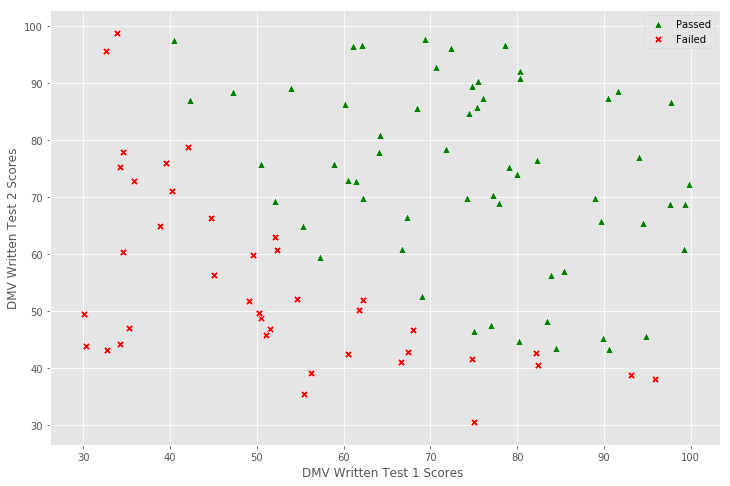

In [15]:
PASSED = (results == 1).reshape(100,1)
FAILED = (results == 0).reshape(100,1)

AX= sns.scatterplot(x = scores[PASSED[:,0],0],
                   y = scores[PASSED[:,0],1],
                   marker = "^",
                   color ='green',
                   s=60)
sns.scatterplot( x = scores[FAILED[:,0],0],
                   y = scores[FAILED[:,0],1],
                   marker = "X",
                   color= 'red',
                   s=60)
AX.set(xlabel="DMV Written Test 1 Scores ",ylabel ="DMV Written Test 2 Scores")
AX.legend(['Passed','Failed'])
plt.show();

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [16]:
# THE OUTPUT OF FUNCTION HERE IS >0.5 MEANS 1 <0.5 IS 0
def LOGISTIC_FUNCTION(x):
    return 1/(1+np.exp(-x))
LOGISTIC_FUNCTION(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [20]:
def COMPUTE_COST(theta, x, y):
    m=len(y)
    y_pred=LOGISTIC_FUNCTION(np.dot(x ,theta))
    error=(y * np.log(y_pred))+(1-y) * np.log(1 - y_pred)
    cost = -1 / m*sum(error)
    GRAD = 1/m * np.dot(x.transpose(),(y_pred - y))
    return cost[0],GRAD

### Task 6: Cost and Gradient at Initialization
---

In [21]:
# ALWAYS PERFORM DATA STANDARDIZATION BEFORE GRADIENT DESCENT
MEAN_SCORES=np.mean(scores,axis=0)
STD_SCORES = np.std(scores,  axis=0)
scores = (scores - MEAN_SCORES)/STD_SCORES

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores,axis=1)
y=results.reshape(rows,1)

theta_init = np.zeros((cols+1,1))
cost,gradient = COMPUTE_COST(theta_init,X,y)
print("COST AT INITIAL",cost)
print("GRADS AT INITIAL",gradient)


COST AT INITIAL 0.693147180559946
GRADS AT INITIAL [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [22]:
def gradient_descent(x,y,theta,alpha,iterations):
    costs = []
    for i in range(iterations):
        cost,gradient=COMPUTE_COST(theta,x,y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta,costs

In [23]:
theta,costs = gradient_descent(X,y,theta_init,1,200)


In [24]:
print("THETA AFTER RUNNING GRADIENT DESCENT : ",theta)
print("RESULTING COST : ",costs[-1])

THETA AFTER RUNNING GRADIENT DESCENT :  [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
RESULTING COST :  0.2048938203512014


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of Cost function over Iterations of Gradient Descent')

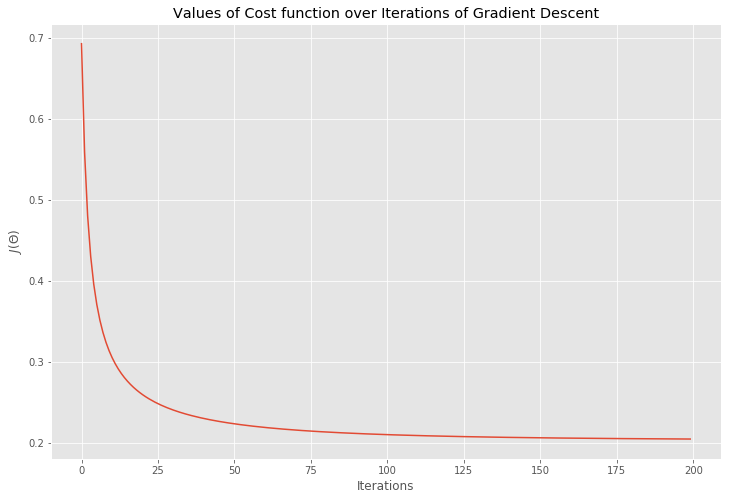

In [25]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost function over Iterations of Gradient Descent")


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

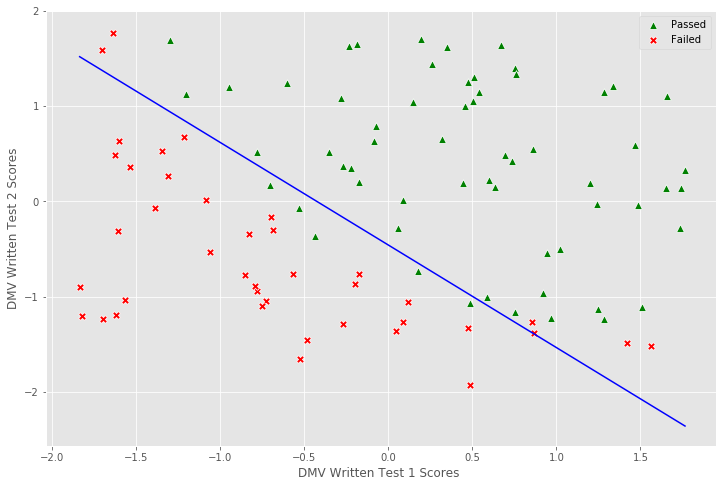

In [29]:
ax = sns.scatterplot(x = X[PASSED[:,0],1],
                   y = X[PASSED[:,0],2],
                   marker = "^",
                   color ='green',
                   s=60)
sns.scatterplot( x = X[FAILED[:,0],1],
                   y = X[FAILED[:,0],2],
                   marker = "X",
                   color= 'red',
                   s=60)
ax.legend(['Passed','Failed'])
ax.set(xlabel="DMV Written Test 1 Scores ",ylabel = "DMV Written Test 2 Scores")

x_boundary=np.array([np.min(X[:,1]), np.max(X[:,1])])
y_boundary=-(theta[0]+theta[1] * x_boundary) / theta[2]

sns.lineplot(x=x_boundary,y=y_boundary, color='blue')
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [30]:
def predict(theta , x):
    results = x.dot(theta)
    return results> 0

In [32]:
p=predict(theta , X)
print("Training Accuracy : ", sum(p==y)[0],"%")

Training Accuracy :  89 %


In [35]:
test= np.array([50,79])
test = (test - MEAN_SCORES)/STD_SCORES
test = np.append(np.ones(1),test)
probability = LOGISTIC_FUNCTION(test.dot(theta))
print("A person who scores 50 and 79 on their DMV  written tests have a ",
     np.round(probability[0], 2),"probabilty of passing ")


A person who scores 50 and 79 on their DMV  written tests have a  1.0 probabilty of passing 
